# Simple regression with TensorFlow

Progressive example working through various network set ups

https://towardsdatascience.com/training-neural-networks-for-price-prediction-with-tensorflow-8aafe0c55198

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.13.1


In [3]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [4]:
X = np.load("./rbfs/phi_reduce.npy")
y = np.load("./rbfs/y.npy")

In [5]:
y.min()

0.0

(array([ 426.,  298.,  409.,  374.,  481.,  807.,  863., 1304.,  646.,
         111.]),
 array([0.    , 0.0044, 0.0088, 0.0132, 0.0176, 0.022 , 0.0264, 0.0308,
        0.0352, 0.0396, 0.044 ]),
 <BarContainer object of 10 artists>)

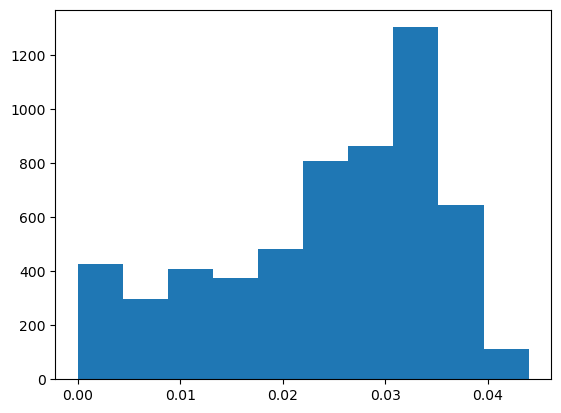

In [6]:
plt.hist(y)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size = 0.8, random_state=42)

## TensorFlow

In [8]:
# Set random seed
tf.random.set_seed(42)
from keras import Sequential
from keras import models
from keras import layers

In [9]:
n_feat = X_train.shape[1]

### Model 1 (Simple TF regression)

In [10]:
model = models.Sequential([
  layers.Dense(512, activation='relu', input_shape=(n_feat,)),
  layers.Dense(512, activation='relu'),
  layers.Dense(256, activation='relu'),
  layers.Dense(256, activation='relu'),
  layers.Dense(128, activation='relu'),
  layers.Dense(1, activation='linear')
], name="Initial_model")
model.summary()

Model: "Initial_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               103424    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 596225 (2.27 MB)
Trainable params: 5962

In [11]:
# Compile the model
model.compile(loss='mae', metrics=['mae', 'mse'], optimizer='adam')

In [12]:
history=model.fit(X_train, y_train, epochs=50, 
                  batch_size=1024, verbose=1, 
                  validation_split=0.2)

Epoch 1/50
4/4 [==============================] - 0s 67ms/step - loss: 0.1475 - mae: 0.1475 - mse: 0.0393 - val_loss: 0.0295 - val_mae: 0.0295 - val_mse: 0.0011
Epoch 2/50
4/4 [==============================] - 0s 16ms/step - loss: 0.0402 - mae: 0.0402 - mse: 0.0021 - val_loss: 0.0323 - val_mae: 0.0323 - val_mse: 0.0012
Epoch 3/50
4/4 [==============================] - 0s 17ms/step - loss: 0.0234 - mae: 0.0234 - mse: 7.4467e-04 - val_loss: 0.0196 - val_mae: 0.0196 - val_mse: 5.5535e-04
Epoch 4/50
4/4 [==============================] - 0s 17ms/step - loss: 0.0141 - mae: 0.0141 - mse: 3.0716e-04 - val_loss: 0.0112 - val_mae: 0.0112 - val_mse: 1.7762e-04
Epoch 5/50
4/4 [==============================] - 0s 17ms/step - loss: 0.0110 - mae: 0.0110 - mse: 1.8729e-04 - val_loss: 0.0089 - val_mae: 0.0089 - val_mse: 1.2708e-04
Epoch 6/50
4/4 [==============================] - 0s 16ms/step - loss: 0.0100 - mae: 0.0100 - mse: 1.4453e-04 - val_loss: 0.0084 - val_mae: 0.0084 - val_mse: 1.1744e-04
Ep

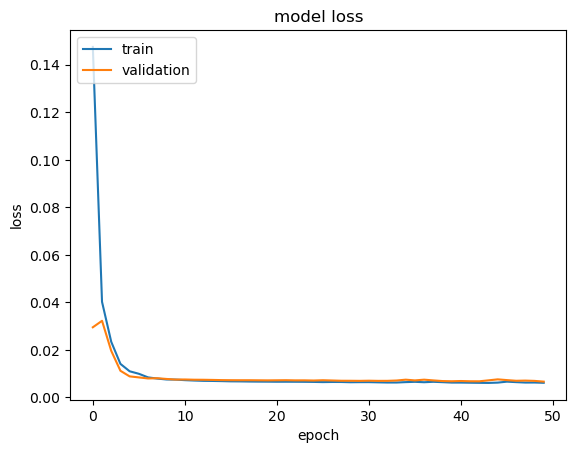

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [14]:
y_test_pred = model.predict(X_test)
mean_absolute_error(y_test, y_test_pred)

36/36 [==============================] - 0s 1ms/step


0.006561412809690187

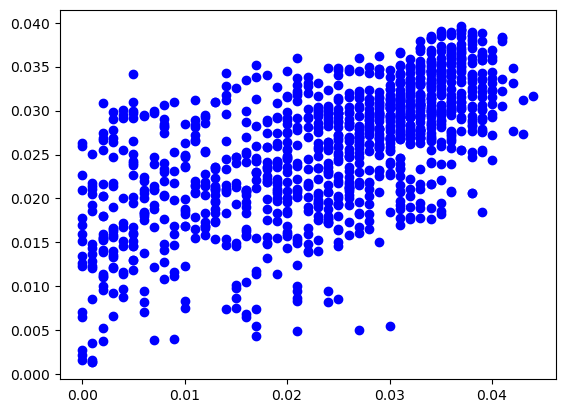

In [15]:
plt.plot(y_test, y_test_pred, 'bo')

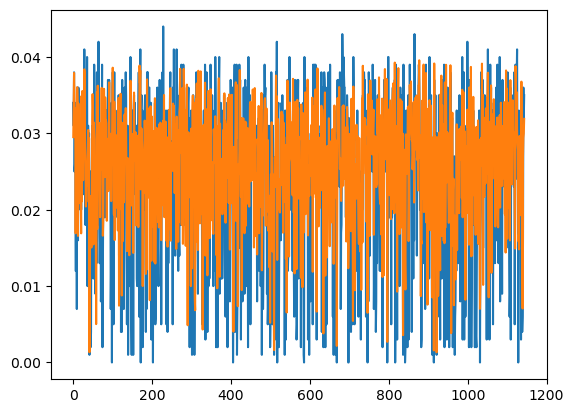

In [16]:
plt.plot(y_test)
plt.plot(y_test_pred)
plt.show()

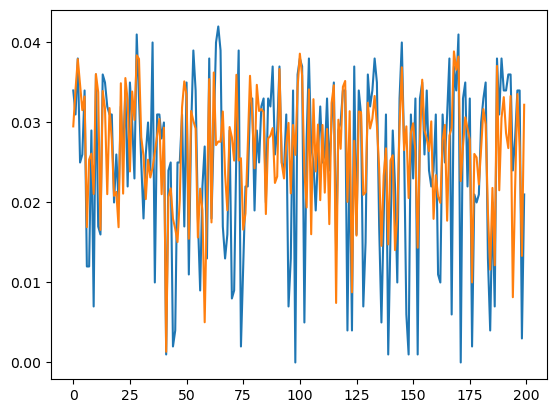

In [17]:
plt.plot(y_test[0:200])
plt.plot(y_test_pred[0:200])
plt.show()